# EXPONENTIAL SMOOTHING

In this notebook, we will learn :
<ol>
    <li>Simple Exponential Smoothing</li>
    <li>Double Exponential Smoothing (aka Holt's Method)</li>
    <li>Triple Exponential Smoothing (aka Holt Winter's Method)</li>
</ol>


I have created above methods from scratch for better understanding.
However if you want to use pre-built methods you can directly use the <b>statsmodels.tsa.holtwinters</b> module.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv',parse_dates=['Month'],index_col='Month')
df.columns=['Volume']
df.reset_index(drop=True,inplace=True)
df.head()

,Volume
0,112
1,118
2,132
3,129
4,121



### 1. Simple Exponential Smoothing : 


Simple Exponential Smoothing (SES) is actually similar to the Weighted Moving Average (WMA) method. <br>
    
Weights introduced in SES decay exponentially ,hence named as Exponential Smoothing.. 
    
    
$$\begin{equation} 
\hat y_t= \alpha.y_t + (1-\alpha).\hat y_{t-1}
\end{equation}
$$


$\alpha$ is the smoothing factor, which defines how quickly we will forget the last available true observation. 
The smaller the alpha, more influence the previous observations have and smoother the sereis is.<br>
    
    
Exponentiality is hidden in the recursiveness of the function -- we multiply by  (1−$\alpha$)  each time, which already contains a multiplication by  (1−$\alpha$)  of previous model values.
    
Also if you add all the associated weights at each time step , the result will always be approximately equal to 1 (one).



In [3]:
def simple_exponential_smoothing(series,alpha=0.6):
    """
        alpha  - smoothing factor. 
        series - Time Series Data
    """
    x = [series[0]]
    
    for i in range(1,len(series)):
        x.append(alpha*series[i]+(1-alpha)*x[i-1]) 
        
    return x

In [4]:
exp1 = simple_exponential_smoothing(df.Volume,alpha=0.05)
exp2 = simple_exponential_smoothing(df.Volume,alpha=0.4)

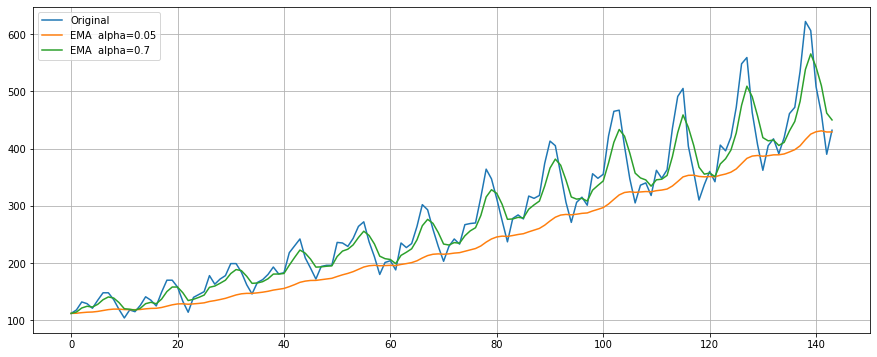

In [5]:
plt.figure(figsize=(15,6))
plt.plot(df.Volume,label="Original")
plt.plot(exp1,label="EMA  alpha=0.05")
plt.plot(exp2,label="EMA  alpha=0.7")
plt.legend()
plt.grid()
plt.show()

If you take a look at above series, the $\alpha$ decided smoothening of series. <br>
Smaller $\alpha$ resulted in smoother series.


###  2. Double Exponential Smoothing  a.k.a Holt's Method


Double Exponential Smoothing is an extension to Simple Exponential Smoothing that explicitly adds support for trends in the univariate time series. 

In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta  ($\beta$ ).


The method supports trends that change in different ways: an additive and a multiplicative, depending on whether the trend is linear or exponential respectively.

Double Exponential Smoothing with an additive trend is classically referred to as <b>Holt’s linear trend model</b>, named for the developer of the method Charles Holt.

$$\begin{equation} 
 L_t = \alpha.y_t + (1-\alpha).(L_{t-1} + T_{t-1}) \text{  ( Level ) } \\
 T_t = \beta.(L_t - L_{t-1}) + (1-\beta).T_{t-1} \text{  ( Trend ) }\\
 \hat{y}_t = L_t + T_t \text{  ( Fitted Model ) } \\
 \hat{y}_{t+h} = L_t + h.T_t \text{  ( Forecast Model ) }\\   
\end{equation}
$$



<br>
where ,<br>


<b>$\alpha$ :-   </b> Smoothing factor for the level.<br>
<b>$\beta$ :-   </b> Smoothing factor for the trend.<br>
<b> h :- </b> # periods into the future

<br>


The values for $\alpha$ and $\beta$ can be obtained via non-linear optimization techniques, such as the <b>Marquardt Algorithm</b>.


Use Double Exponential Smoothing as a general smoothing method and to provide short-term forecasts when your data have a trend and do not have a seasonal component.




In [6]:
def double_exponential_smoothing(y,alpha=0.6,beta=0.6):
    x = [y[0]]
    
    l,b = [y[0]],[y[1]-y[0]]
    
    
    for i in range(1,len(y)):
        l.append(alpha*y[i] + (1-alpha)*(l[i-1] + b[i-1]))
        b.append(beta*(l[i]-l[i-1]) + (1-beta)*b[i-1])
        
        x.append(l[i] + b[i])
        
    return x

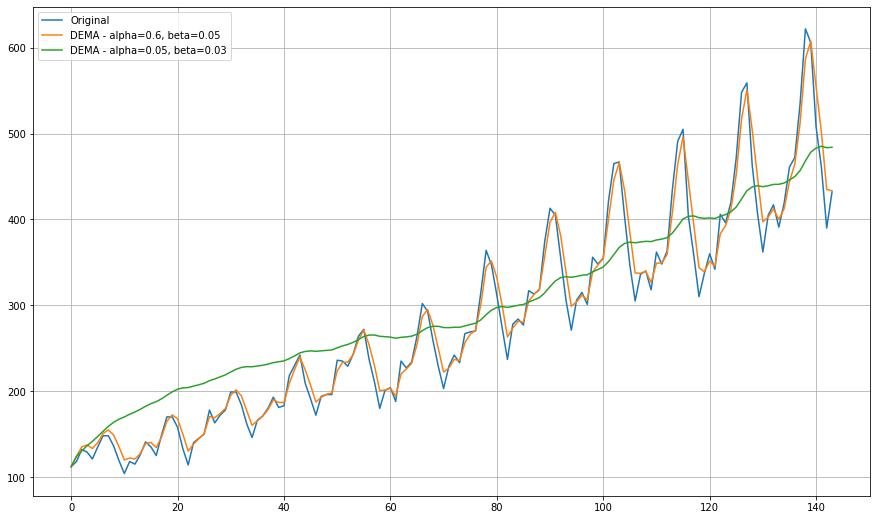

In [7]:
plt.figure(figsize=(15,9))
plt.plot(df.Volume,label='Original')
plt.plot(double_exponential_smoothing(df.Volume,alpha=0.6,beta=0.05),label='DEMA - alpha=0.6, beta=0.05')
plt.plot(double_exponential_smoothing(df.Volume,alpha=0.05,beta=0.03),label='DEMA - alpha=0.05, beta=0.03')
plt.legend()
plt.grid()
plt.show()

<b>Note : </b><br>
If you ever want to use Holt's Method for Forecast purpose, it's better to first remove seasonlity from series. As the Double Exponential Smoothing Method only accounts for trend component.

###  3. Triple Exponential Smoothing a.k.a Holt Winter's Method

Triple Exponential Smoothing is an extension of Double Exponential Smoothing that explicitly adds support for seasonality to the univariate time series.

This method is also called as Holt-Winters Exponential Smoothing, named for two contributors to the method: Charles Holt and Peter Winters.

In addition to the $\alpha$ and $\beta$ smoothing factors, a new parameter is added called $\gamma$ that controls the influence on the seasonal component.

As with the trend, the seasonality may also be modeled as either an additive or multiplicative process for a linear or exponential change in the seasonality.

<b>Additive Seasonality:</b> Triple Exponential Smoothing with a linear seasonality. ( Below eqn )<br>
<b>Multiplicative Seasonality:</b> Triple Exponential Smoothing with an exponential seasonality.<br>


Triple exponential smoothing is the most advanced variation of exponential smoothing and through configuration, it can also develop double and single exponential smoothing models.<br>

Being an adaptive method, Holt-Winter’s exponential smoothing allows the level, trend and seasonality patterns to change over time.

Additionally, to ensure that the seasonality is modeled correctly, the number of time steps in a seasonal period (Period) must be specified. For example, if the series was monthly data and the seasonal period repeated each year, then the Period(p)=12.





$$\begin{equation} 
 L_t = \alpha.y_t + (1-\alpha).(L_{t-1} + T_{t-1}) \text{  ( Level ) } \\
 T_t = \beta.(L_t - L_{t-1}) + (1-\beta).T_{t-1} \text{  ( Trend ) }\\
 S_t = \gamma.(y_t - L_{t-1}- T_{t-1}) + (1-\gamma).S_{t-p} \text{  ( Seasonal ) } \\
 y_t = (L_t + T_t)+S_t  \text{( Fitted Model )}\\
 y_{t+p} = (L_t + m.T_t)+S_{t-p+1+(m-1)modp}  \text{( Forecast Model )}\\
\end{equation}
$$


where,

$\alpha$ : Smoothing factor for the level.<br>
$\beta$  : Smoothing factor for the trend.<br>
$\gamma$ : Smoothing factor for the seasonality.<br>
<b>m</b>: # periods into the future.<br>
<b>p</b>: Time steps in seasonal period.<br>

<br>

In [8]:
class HoltWinters:
    
    """    
    # series - initial time series
    # slen - length of a season
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon
   
    """
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        

    def initial_trend(self):
        sum = 0.0
        for i in range(self.slen):
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        n_seasons = int(len(self.series)/self.slen)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   

          
    def triple_exponential_smoothing(self):
        self.result = []
              
        seasonals = self.initial_seasonal_components()
        
        for i in range(len(self.series)+self.n_preds):
            
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()
                self.result.append(self.series[0])
                continue
                
            if i >= len(self.series): # Predictions
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend)+seasonals[i%self.slen])        
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth-trend) + (1-self.gamma)*seasonals[i%self.slen]
                self.result.append((smooth+trend)+seasonals[i%self.slen])


In [9]:
model = HoltWinters(df.Volume, slen = 12,alpha = 0.2 ,beta = 0.14 ,gamma = 0.7, n_preds = 50)
model.triple_exponential_smoothing()

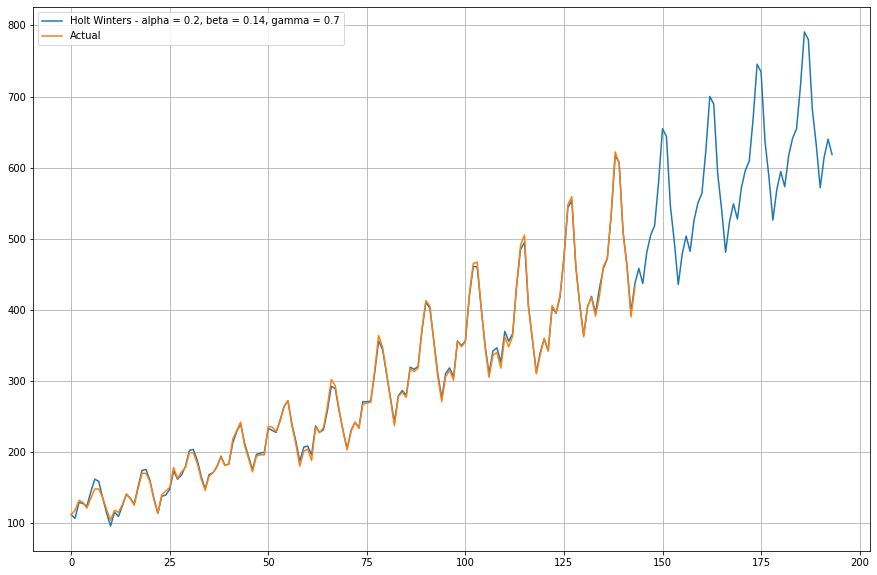

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(model.result, label = "Holt Winters - alpha = 0.2, beta = 0.14, gamma = 0.7")
plt.plot(df.Volume, label = "Actual")
plt.legend()
plt.grid()
plt.show()

Observe the above plot, we can even make use of holt winters method for forecasting purpose as well. 